# Importing

In [ ]:
#importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn import metrics

Data Collection and Processing

# Loading dataset

In [ ]:
# loading the data from csv file to pandas dataframe
cars = pd.read_csv('/content/car data.csv')

# Visualizing data set


In [ ]:
# inspecting the first 5 rows of the dataframe
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


(0.0, 8.0)

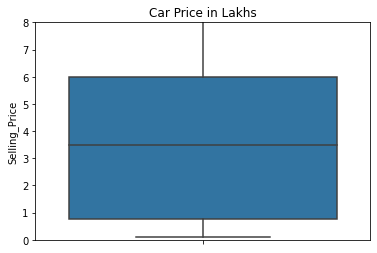

In [ ]:
plt.title('Car Price in Lakhs')
sns.boxplot(y=cars.Selling_Price)
plt.ylim(0,8)

In [ ]:
# checking the number of rows and columns
cars.shape

(589, 9)

# Data Preprocessing

In [ ]:
# getting some information about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       589 non-null    object 
 1   Year           589 non-null    int64  
 2   Selling_Price  589 non-null    float64
 3   Present_Price  589 non-null    float64
 4   Kms_Driven     589 non-null    int64  
 5   Fuel_Type      589 non-null    object 
 6   Seller_Type    589 non-null    object 
 7   Transmission   589 non-null    object 
 8   Owner          589 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 41.5+ KB


In [ ]:
# checking the number of missing values
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of data
print(cars.Fuel_Type.value_counts())
print(cars.Seller_Type.value_counts())
print(cars.Transmission.value_counts())

Petrol    481
Diesel    103
CNG         5
Name: Fuel_Type, dtype: int64
Dealer        382
Individual    207
Name: Seller_Type, dtype: int64
Manual       526
Automatic     63
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type","Seller_Type" and "Transmission"  Columns
cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

cars.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

cars.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [ ]:
X = cars.drop(['Car_Name','Selling_Price'],axis=1)
Y = cars['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
584  2017           8.70       21200  ...            0             0      0
585  2014           7.00       35000  ...            0             0      0
586  2016           9.40       19434  ...            0             0      0
587  2017           5.80       19000  ...            0             0      0
588  2015          10.00       18828  ...            0             0      0

[589 rows x 7 columns]


In [ ]:
print(Y)

0      3.35
1      4.75
2      7.25
3      2.85
4      4.60
       ... 
584    6.50
585    3.65
586    8.35
587    4.80
588    6.70
Name: Selling_Price, Length: 589, dtype: float64


Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

**bold text**# Algorithm #1 Linear Regression

1. Linear Regression

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
 # mean squared error
 mean_square_error =(mean_squared_error(Y_train, training_data_prediction))
 print("mean_square_error : ", mean_square_error)

mean_square_error :  2.820267983050152


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8466720673469498


Visualize the actual prices and Predicted prices

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

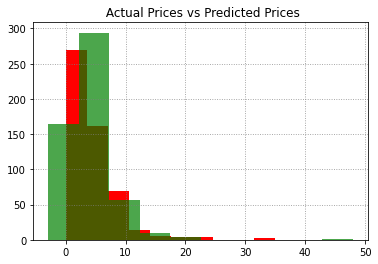

In [ ]:
plt.grid(b = True, color ='grey', linestyle ='dotted', linewidth = 0.9,alpha = 0.8)
plt.hist( Y_train, color ='red')
plt.hist( training_data_prediction,color = 'green',alpha = 0.7)
plt.title(" Actual Prices vs Predicted Prices")
#plt.yscale('log')
plt.show()

In [ ]:
# Accuracy
lin_reg_model.score(X_train, Y_train)

0.8786032898505237

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
test_data_prediction

array([ 6.9729766 ,  9.56720656,  8.46939553,  5.558823  ,  4.85845794,
        4.22369094,  0.66888515,  9.61571514,  1.04860508,  9.52540144,
        7.11568034,  8.46939553,  4.90544977,  0.29939185,  4.36939708,
        3.77873814,  8.53799563,  2.13181261,  6.54010562, -0.77149025,
        4.5054858 ,  4.93991232,  4.57631805,  5.835178  ,  4.62769973,
       -2.18201779,  8.77802927,  6.06720037, -0.85780196,  5.76910566,
       -2.94835832,  6.06720037,  1.67137356,  5.66322856,  4.43726935,
        6.42055101,  1.9122632 , -0.08783934,  1.3128833 ,  3.72272301,
        1.9178337 ,  9.29904192,  6.19344926,  6.39530166, -0.80162178,
       10.31286598,  1.78714717,  1.26886398, 13.65483221,  9.4059261 ,
        8.53799563,  5.558823  ,  2.59953066,  2.66257083,  5.31051838,
        1.51806295,  1.77436126,  0.37063886,  0.96044814])

In [ ]:
  # mean squared error
mean_square_error =(mean_squared_error(Y_test, test_data_prediction))
print("mean_square_error : ", mean_square_error)

mean_square_error :  1.7294642547012573


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8851783535439127


model is neither overfitting nor underfitting

In [ ]:
# coefficient
lin_reg_model.coef_

array([ 3.77982919e-01,  4.64900935e-01, -2.86284246e-06,  1.06427025e+00,
       -1.07626024e+00,  8.86253370e-01, -3.84559130e-01])

In [ ]:
# intercept
lin_reg_model.intercept_

-759.8353870371975

In [ ]:
#predictions
lin_reg_model.predict([[2013,6.5,15000,0,1,0,0]])

array([2.94688127])

In [ ]:
lin_reg_model.predict([[2014,5.59,27000,0,0,0,0]])

array([3.94371047])

lets see how this model works

i.e dependent variable = (coefs*independent variables )
+intercept

Y = m * X + b (m is coefficient and b is intercept)

In [ ]:
3.76433830e-01*2014+ 4.56973254e-01*5.59+-2.47308549e-06*27000+1.06472718e+00*0+ -1.06300866e+00*0+1.18781968e+00*0+1.46900803e-01*0+-756.7480073074614

3.8774334941685993

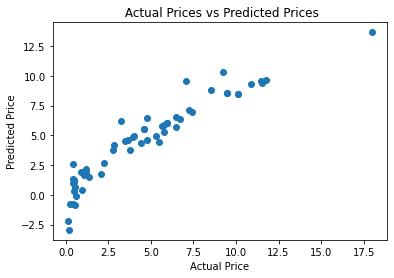

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# Accuracy
lin_reg_model.score(X_test, Y_test)

0.8841752718057845

# Algorithm #2 Lasso regression


2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
 #mean squared error
 mean_square_error =(mean_squared_error(Y_train, training_data_prediction))
 print("mean_square_error : ", mean_square_error)

mean_square_error :  2.820267983050152


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8466720673469498


Visualize the actual prices and Predicted prices

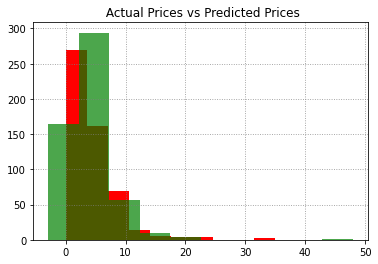

In [ ]:
plt.grid(b = True, color ='grey', linestyle ='dotted', linewidth = 0.9,alpha = 0.8)
plt.hist( Y_train, color ='red')
plt.hist( training_data_prediction,color = 'green',alpha = 0.7)
plt.title(" Actual Prices vs Predicted Prices")
#plt.yscale('log')
plt.show()

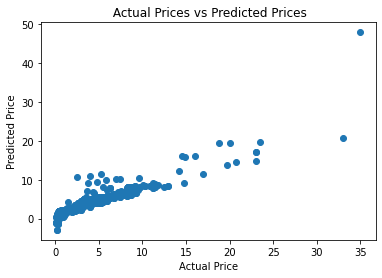

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
lass_reg_model.predict([[2014,5.59,27000,0,0,0,0]])

array([3.76873959])

In [ ]:
#predictions
lass_reg_model.predict([[2013,6.5,15000,0,1,0,0]])

array([4.05024656])

In [ ]:
 #mean square error
 mean_square_error =(mean_squared_error(Y_test, test_data_prediction))
 print("mean_square_error : ", mean_square_error)

mean_square_error :  2.1325995705838667


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8584136137764338


In [ ]:
# Accuracy
lass_reg_model.score(X_test, Y_test)

0.8584136137764338

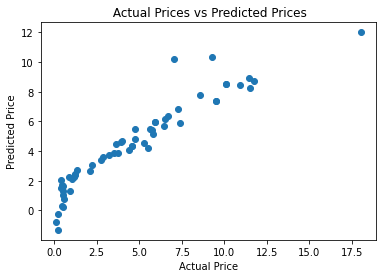

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()